## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [31]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import warnings

warnings.filterwarnings('ignore')

In [53]:
# Импортирование необходимых модулей и атрибутов
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Загружаем исходные данные

In [34]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [35]:
train[:1]

array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 188., 255.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [36]:
# сохраняем разметку в отдельную переменную

train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [55]:
X_train = train[:, 1:]
Y_train = train[:, 0]

X_test = test

In [38]:
train_img.shape

(42000, 28, 28)

In [39]:
train_img[:1].shape

(1, 28, 28)

In [40]:
X_train.shape, Y_train.shape

((42000, 784), (42000,))

In [41]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [42]:
X_test.shape

(28000, 784)

## Визуализируем исходные данные

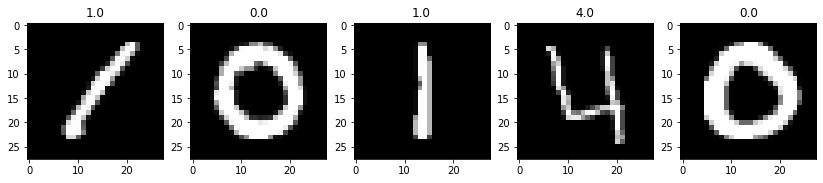

In [46]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(np.resize(X_train, (train.shape[0], 28, 28))[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % Y_train[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [47]:
# Настройка параметров оценивания алгоритма
seed = 42
num_folds = 5
n_estimators = 10
scoring = 'accuracy'

In [56]:
from sklearn.model_selection import train_test_split
Y_train, Y_val, X_train, X_val = train_test_split(
    Y_train, X_train, test_size=0.2,
    random_state=seed)

## Берём пять моделей из классического ML

In [50]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators=n_estimators)))


In [51]:
# Получаем предсказание

predictions = {}

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

    m_fit = model.fit(X_train, Y_train)
    predictions[name] = m_fit.predict(X_val)

    print(name)

LR
KNN
CART
SVC
RF


## Оцениваем качество решение на валидационной выборке

In [64]:
model_acc = {}
for name in predictions:
    model_acc[name] = round(accuracy_score(Y_val, predictions[name]), 3)
    print(f'Модель {name} показала точность - {model_acc[name] * 100} %')

Модель LR показала точность - 91.8 %
Модель KNN показала точность - 96.5 %
Модель CART показала точность - 85.5 %
Модель SVC показала точность - 97.3 %
Модель RF показала точность - 93.8 %


In [68]:
max_acc = max(model_acc.values())

new_dict = {}
for key, value in model_acc.items():
    new_dict[value] = key

print(f'Наилучшую точность показала модель - {new_dict[max_acc]} \n', classification_report(Y_val, predictions[new_dict[max_acc]]))

Наилучшую точность показала модель - SVC 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       816
         1.0       0.98      0.99      0.99       909
         2.0       0.98      0.97      0.97       846
         3.0       0.97      0.96      0.96       937
         4.0       0.96      0.97      0.97       839
         5.0       0.97      0.97      0.97       702
         6.0       0.98      0.99      0.98       785
         7.0       0.98      0.97      0.97       893
         8.0       0.97      0.97      0.97       835
         9.0       0.96      0.96      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



## Предсказания на тестовыйх данных

In [69]:
model = SVC()

kfold = KFold(n_splits=num_folds, random_state=seed)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)

m_fit = model.fit(X_train, Y_train)
pred_test = m_fit.predict(X_test)

## Визуализируем предсказания

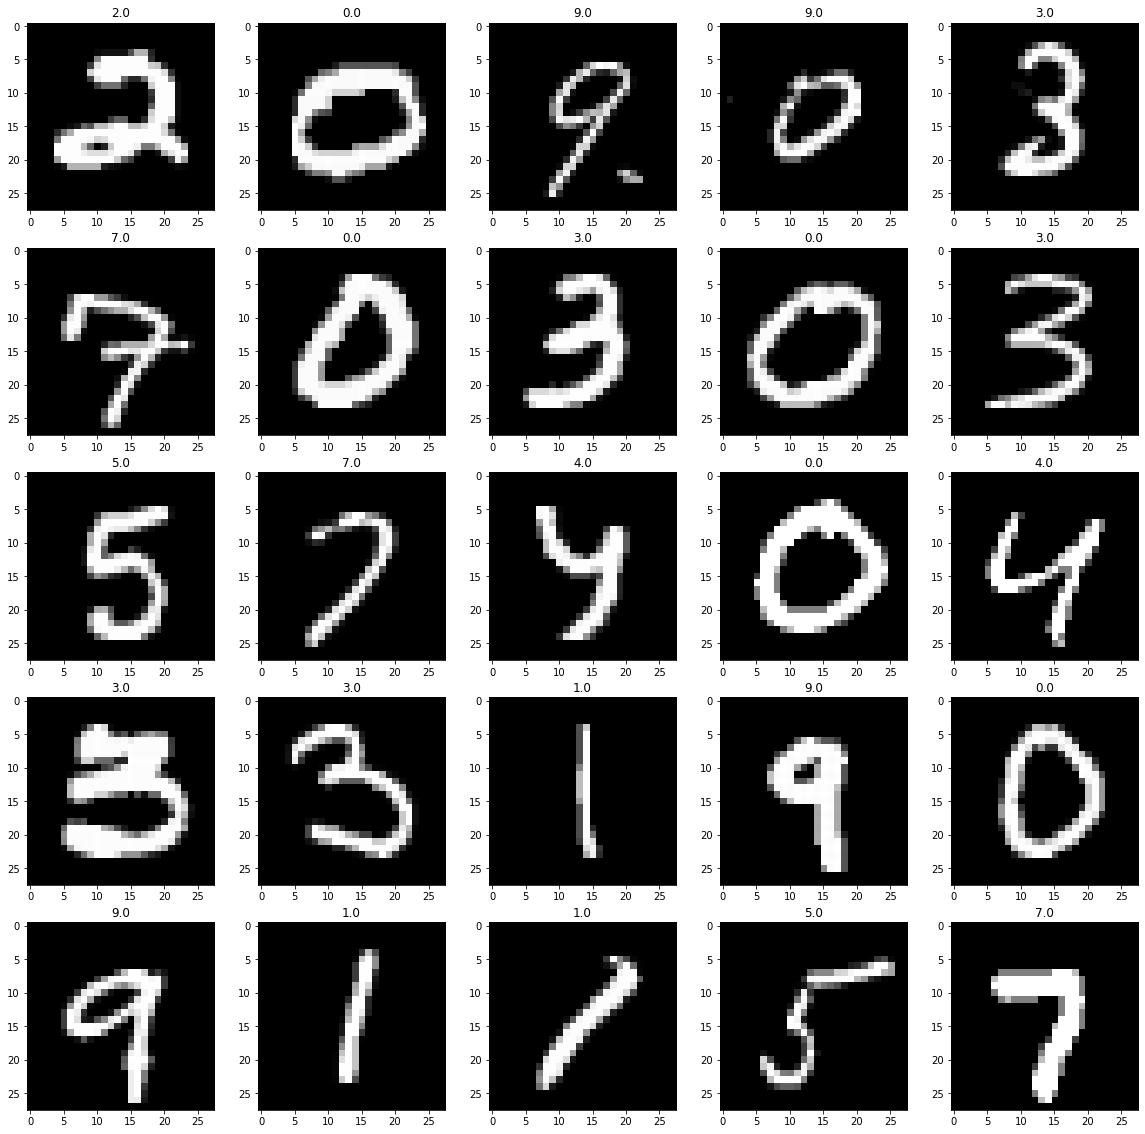

In [74]:
fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(test_img[0:25], 1):
    subplot = fig.add_subplot(5, 5, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);